<a href="https://colab.research.google.com/github/LKSfiuza/MachineLearning-AI-UFV/blob/main/Sistema_Fuzzy_Atividade_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - No material disponibilizado na disciplina, apostila e aulas gravadas, foi construído um sistema de inferência fuzzy Mamdani para sugerir a gorjeta para garçons em um restaurante. Utilizando este sistema, calcule a saída para as entradas:
##   1.1 - Comida = 3 e Serviço = 8
##   1.2 - Comida = 8 e Serviço = 6
##   1.3 - É possível alcançar o valor máximo de gorjeta?
## 2 - Implemente o exemplo da gorjeta para o garçom utilizando o método de inferência Takagi-Sugeno-Kang com as funções das regras propostas na atividade. Calcule a saída para ambas as entradas do item 1. É possível alcançar o valor máximo de gorjeta neste tipo de inferência?

In [1]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


In [2]:
# Instalando a biblioteca Simpful

!pip install simpful
import simpful as sf

In [3]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



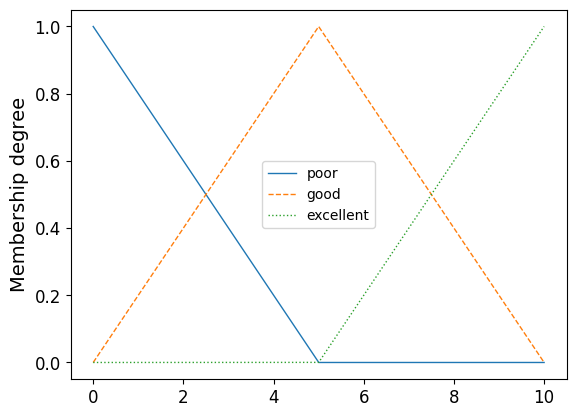

In [4]:
# Selecionando as variaveis de entrada da qualidade do serviço

S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor") # saida = [0% 100% 0%]
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

sf.LinguisticVariable([S_1, S_2, S_3], universe_of_discourse=[0, 10]).plot()

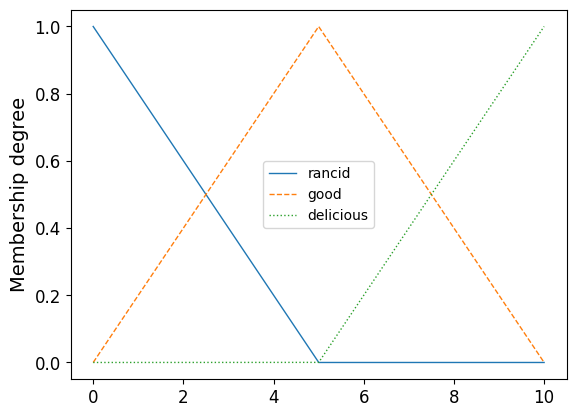

In [12]:
# Selecionando as variaveis de entrada da qualidade da comida

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="rancid") # entrada
F_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
F_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2, F_3], concept="Food quality", universe_of_discourse=[0,10]) )

sf.LinguisticVariable([F_1, F_2, F_3], universe_of_discourse=[0, 10]).plot()

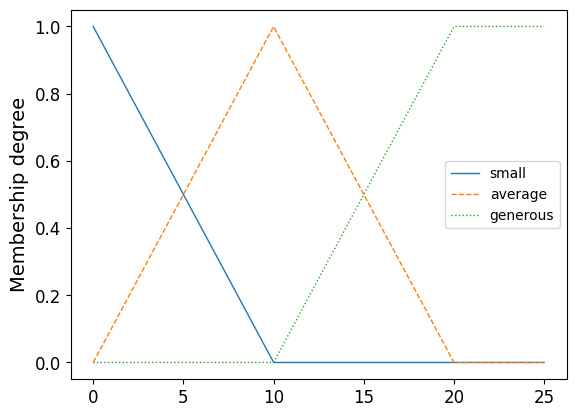

In [15]:
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="small") # entrada
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generous")
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3], concept="Tip", universe_of_discourse=[0,25]) )

sf.LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0, 25]).plot()

In [17]:

# Definindo a base de regras

R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS poor) AND (Food IS good) THEN (Tip IS small)"
R3 = "IF (Service IS poor) AND (Food IS delicious) THEN (Tip IS average)"
R4 = "IF (Service IS good) AND (Food IS rancid) THEN (Tip IS small)"
R5 = "IF (Service IS good) AND (Food IS good) THEN (Tip IS generous)"
R6 = "IF (Service IS good) AND (Food IS delicious) THEN (Tip IS generous)"
R7 = "IF (Service IS excellent) AND (Food IS rancid) THEN (Tip IS average)"
R8 = "IF (Service IS excellent) AND (Food IS good) THEN (Tip IS generous)"
R9 = "IF (Service IS excellent) AND (Food IS delicious) THEN (Tip IS generous)"

FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9])


### Pergunta 1.1 - Entrada: Comida = 3 e Serviço = 8

In [26]:
# Repassando os valores de entrada

FS.set_variable("Service", 8)
FS.set_variable("Food", 3)


In [27]:
# Valor de saida para a gorjeta

print(f'O valor da gorjeta deverá ser de {FS.Mamdani_inference(["Tip"])}')

O valor da gorjeta deverá ser de {'Tip': 13.74852769105565}


### Pergunta 1.2 - Entrada: Comida = 8 e Serviço = 6

In [28]:
# Repassando os valores de entrada

FS.set_variable("Service", 6)
FS.set_variable("Food", 8)

In [29]:
# Valor de saida para a gorjeta

print(f'O valor da gorjeta deverá ser de {FS.Mamdani_inference(["Tip"])}')

O valor da gorjeta deverá ser de {'Tip': 18.881382251139424}


## Pergunta 1.3 - É possível alcançar o valor máximo de gorjeta?

In [30]:
# Repassando os valores de entrada

FS.set_variable("Service", 10)
FS.set_variable("Food", 10)

In [31]:
# Valor de saida para a gorjeta

print(f'O valor da gorjeta deverá ser de {FS.Mamdani_inference(["Tip"])}')

O valor da gorjeta deverá ser de {'Tip': 19.59010549203194}


## Resposta:  Apesar de ter sido encontrado um valor próximo e bem generoso de gorjeta, mesmo possuindo notas máximas de Service e Food, não foi possível alcançar a gorjeta máxima de 25%.

## 2 - Implemente o exemplo da gorjeta para o garçom utilizando o método de inferência Takagi-Sugeno-Kang com as funções das regras propostas na atividade. Calcule a saída para ambas as entradas do item 1. É possível alcançar o valor máximo de gorjeta neste tipo de inferência?

In [37]:
# Metodo Takagi-Sugeno-Kang

from simpful import *

FS_TS = FuzzySystem()

# Definindo as variaveis de entrada e as variaveis linguisticas

# Para Serviço

S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS_TS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

# Para Comida

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="good")
F_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="delicious")
FS_TS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2,F_3], concept="Food quality"))

# Definindo a saida para os valores de Gorjeta

FS_TS.set_crisp_output_value("small", 6)
FS_TS.set_crisp_output_value("average", 15)

# Definindo a função para uma gorjeta generosa

FS_TS.set_output_function("generous", "1*Food+1*Service+5")

# Definindo as regras fuzzy do modelo

R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS poor) AND (Food IS good) THEN (Tip IS small)"
R3 = "IF (Service IS poor) AND (Food IS delicious) THEN (Tip IS average)"
R4 = "IF (Service IS good) AND (Food IS rancid) THEN (Tip IS small)"
R5 = "IF (Service IS good) AND (Food IS good) THEN (Tip IS generous)"
R6 = "IF (Service IS good) AND (Food IS delicious) THEN (Tip IS generous)"
R7 = "IF (Service IS excellent) AND (Food IS rancid) THEN (Tip IS average)"
R8 = "IF (Service IS excellent) AND (Food IS good) THEN (Tip IS generous)"
R9 = "IF (Service IS excellent) AND (Food IS delicious) THEN (Tip IS generous)"

FS_TS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9])

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type


In [38]:
# Comida =  3 e Serviço =  8

FS_TS.set_variable("Service", 8)
FS_TS.set_variable("Food", 3)

print(f'O valor da gorjeta deverá ser de {FS_TS.Sugeno_inference(["Tip"])}')

O valor da gorjeta deverá ser de {'Tip': 13.125000000000002}


In [39]:
# Comida =  8 e Serviço =  6

FS_TS.set_variable("Service", 6)
FS_TS.set_variable("Food", 8)

print(f'O valor da gorjeta deverá ser de {FS_TS.Sugeno_inference(["Tip"])}')

O valor da gorjeta deverá ser de {'Tip': 17.454545454545453}


In [41]:
# Tentativa de um valor maximo de gorjeta

# Comida =  10 e Serviço =  10

FS_TS.set_variable("Service", 10)
FS_TS.set_variable("Food", 10)

print(f'O valor da gorjeta deverá ser de {FS_TS.Sugeno_inference(["Tip"])}')

O valor da gorjeta deverá ser de {'Tip': 25.0}


##RESPOSTA: Houve pequenas diferenças nos resultados de gorjeta entre os valores da inferência Mamdani e do TSK. No entanto, a principal diferença foi a possibilidade de alcançar a taxa máxima de gorjeta de 25% no modelo TSK

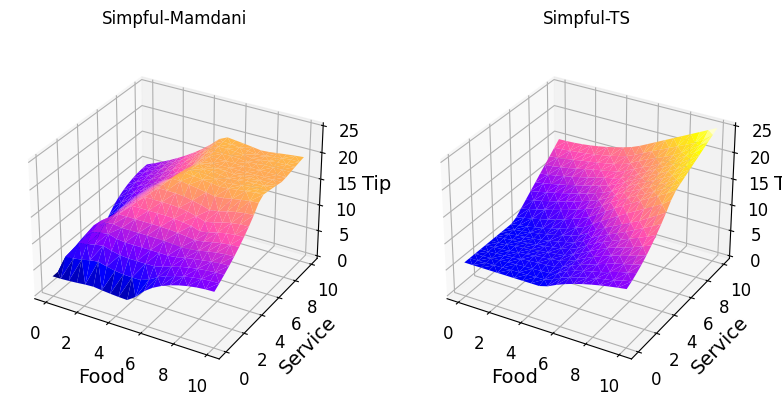

In [42]:
import matplotlib.pylab as pltpy
from numpy import linspace, array
# Plotting surface
xs = []
ys = []
zs = []
DIVs = 20
for x in linspace(0,10,DIVs):
	for y in linspace(0,10,DIVs):
		FS.set_variable("Food", x)
		FS.set_variable("Service", y)
		tip = FS.inference()['Tip']
		xs.append(x)
		ys.append(y)
		zs.append(tip)
xs = array(xs)
ys = array(ys)
zs = array(zs)

from mpl_toolkits.mplot3d import Axes3D
fig = pltpy.figure(figsize=(10, 4))
fs_mam = fig.add_subplot(1,2,1, projection='3d')

xx, yy = pltpy.meshgrid(xs,ys)

fs_mam.plot_trisurf(xs,ys,zs, vmin=0, vmax=25, cmap='gnuplot2')
fs_mam.set_xlabel("Food")
fs_mam.set_ylabel("Service")
fs_mam.set_zlabel("Tip")
fs_mam.set_title("Simpful-Mamdani", pad=20)
fs_mam.set_zlim(0, 25)
pltpy.tight_layout()

xs = []
ys = []
zs_TS = []
DIVs = 20
for x in linspace(0,10,DIVs):
	for y in linspace(0,10,DIVs):
		FS_TS.set_variable("Food", x)
		FS_TS.set_variable("Service", y)
		tip = FS_TS.inference()['Tip']
		xs.append(x)
		ys.append(y)
		zs_TS.append(tip)
xs = array(xs)
ys = array(ys)
zs_TS = array(zs_TS)

fs_ts = fig.add_subplot(1,2,2, projection='3d')

fs_ts.plot_trisurf(xs,ys,zs_TS, vmin=0, vmax=25, cmap='gnuplot2')
fs_ts.set_xlabel("Food")
fs_ts.set_ylabel("Service")
fs_ts.set_zlabel("Tip")
fs_ts.set_title("Simpful-TS", pad=20)
fs_ts.set_zlim(0, 25)
pltpy.tight_layout()

pltpy.show()